In [40]:
from google.colab import files

uploaded = files.upload()

Saving Value iteration algorithm.png to Value iteration algorithm.png


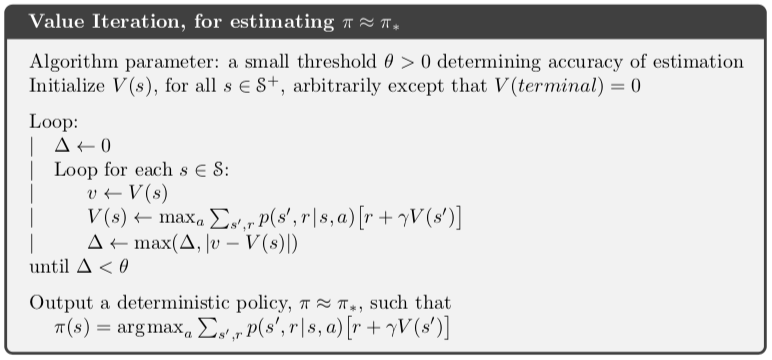

In [43]:
from IPython.display import Image
Image('Value iteration algorithm.png')

In [0]:
import matplotlib.pyplot as plt

In [57]:
"Value Iteration for Sports Betting"
"Value iteration helps generate v* (optimal value function) and pi* (optimal policy function)"

"Discount factor"
gamma = 1
"Probability of home team winning"
p = 0.4
"The number of states availabe"
numStates = 100
"List for storing the reward value"
reward = [0 for _ in range(101)]
reward[100]=1
"Small threshold value for comparing the difference"
theta = 0.00000000001

"List to store the value function for all states form 1 to 99"
value=[0 for _ in range(101)]
"List to store the amount of bet that gives the max reward"
policy = [0 for _ in range(101)]
"store value function at each sweep"
value_at_sweep = {}

def reinforcement_learning():
    sweep = 0
    delta = 1
    while delta > theta:
        delta = 0
        "Looping over all the states i.e the money in hand for a current episode"
        for i in range(1,numStates):
            oldvalue = value[i]
            bellmanequation(i)
            diff = abs(oldvalue-value[i])
            delta = max(delta,diff)
        sweep += 1
        value_at_sweep[sweep] = list(value)
    print(sweep) #Prints number of sweeps taken to get V*
    print(value) #Prints final value of value function i.e Optimal value function

def bellmanequation(num):
    "Initialize optimal value to be zero"
    optimalvalue = 0

    "The range of number of bets"
    for bet in range(0,min(num,100-num)+1):
        "Amount after winning and losing"
        win = num + bet
        loss = num - bet
        "calculate the average of possible states for an action"
        "In this case it would be home team winning or away team winning"
        sum = p * (reward[win] + gamma * value[win]) + (1 - p) * (reward[loss] + gamma * value[loss])

        "Choose the action that gives the max reward and update the policy and value for that"
        if sum > optimalvalue:
            optimalvalue = sum
            value[num] = sum
            policy[num] = bet
            
reinforcement_learning()

21
[0, 0.0020656247759378078, 0.005164061941278314, 0.009225471067629384, 0.012910154853396786, 0.01738539898120295, 0.023063677669395058, 0.027814113056216477, 0.03227538713349196, 0.03768507279491931, 0.04346349745321284, 0.05035446998049632, 0.05765919417368864, 0.0652393748655627, 0.06953528264057765, 0.07443123938872179, 0.0806884678337299, 0.0866110436769516, 0.09421268198829781, 0.10314362491933765, 0.10865874363323309, 0.11596662620617099, 0.1258861749516026, 0.13357997572370262, 0.14414798543422158, 0.16000000000000003, 0.16309843716476702, 0.1677460929120381, 0.17383820660163707, 0.1793652322800952, 0.18607809847192774, 0.1945955165042132, 0.20172116958434663, 0.208413080700238, 0.2165276091929787, 0.2251952461799399, 0.2355317049709616, 0.24648879126053297, 0.25785906229886024, 0.26430292396098226, 0.27164685908315667, 0.281032701750608, 0.28991656551578726, 0.30131902298257696, 0.3147154373793162, 0.32298811544989403, 0.33394993930947237, 0.3488292624275897, 0.3603699635856

<function matplotlib.pyplot.show>

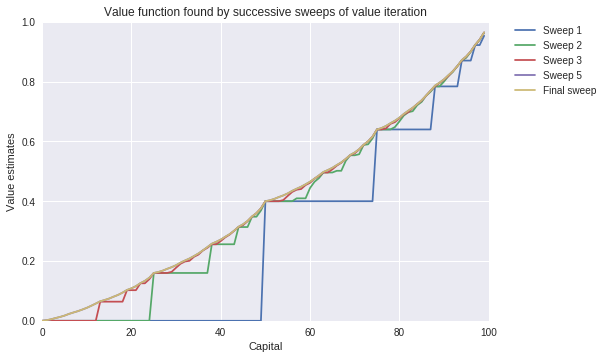

In [58]:
plt.subplot(111)
plt.plot(value_at_sweep[1][0:100], label="Sweep 1")
plt.plot(value_at_sweep[2][0:100], label="Sweep 2")
plt.plot(value_at_sweep[3][0:100], label="Sweep 3")
plt.plot(value_at_sweep[9][0:100], label="Sweep 5")
plt.plot(value_at_sweep[21][0:100], label="Final sweep")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlim(0,100)
plt.ylim(0.0,1.0)
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.title('Value function found by successive sweeps of value iteration')
plt.show

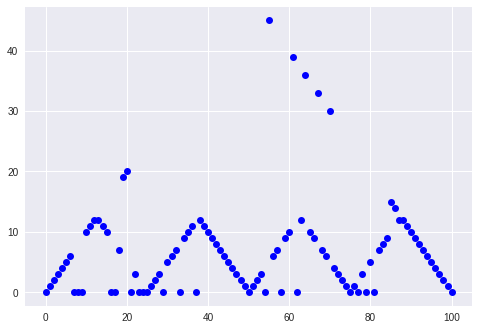

In [61]:
plt.close
fig, ax1 = plt.subplots()
ax1.plot(policy,'bo')

plt.show()